In [9]:
### IMPORTS GENERAL MODULES
import numpy as np
import math
import os
import matplotlib.pyplot as plt
from pylab import title, show
from scipy.constants import c,e
import sys
from sklearn.preprocessing import normalize

#IMPORT MODULES FOR LPA-TOOLS
sys.path.append('../')
from laser import laser_profiles as las
from elementary_processes import ionization as ion
from elementary_processes import potential as pot
from elementary_processes import program_tools as tools
from particles import particle_data as ptcl



### Input parameters 

In [10]:
#----------------
# LASER PARAMETER
#----------------

#Peak a0 of  the laser pulse
a0 = 2.0

#Wavelength of the laser (in microns)
lambda_0 = 800e-3

#Waist of the laser in the focus (in microns)
w0 = 22

#Laser duration (in femtoseconds)
ctau = 10.1

#Laser focus (in microns)
zf = 50

#-------------------
# PARTICLE PARAMETER
#-------------------

#Max gas density (in 1/cm^3)
n = 1e24

#Amount of dope gas (in percent)
am_dope = 1.

#The used element (use the shortcut)
element = 'N'

#The energy level that should get ionized
ion_level = 6

#Energy of the ionized electrons after ionization (in Joule)
energy = 0*e


#---------------------
# SIMULATION PARAMETER
#---------------------

#Array over the laser pulse
zz = np.linspace(3*ctau,-3*ctau,1e6)



/home/sebastian/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:45: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


---

### Calculations

In [14]:
#------------------------------------
# Calculate the ionization parameters
#------------------------------------

#Dope gas density
ne = n*am_dope/100

#Ionization energy
U_i = ptcl.get_ion_energy(element,ion_level)

#Ionization probability
prob = ion.ionization_probability(zz,a0,w0,ctau,zf,lambda_0,U_i,energy)

#Ionization degree:
"""
NOTE: This function assumes, that ALL electrons have the same given kinetic energy after 
      ionization! Use the function in the next cell (ionization-energy-distribution) if
      you want to get an energy distribution of the ionized electrons for a given
      ionization level!
"""
degree = ion.ionization_degree(zz,prob)


#Min a0 for ionization:
min_a0 = ion.get_min_a0(zz,w0,ctau,zf,lambda_0,U_i,energy)

#Laser field
laser_field = las.gaussian_field(zz, a0,w0,ctau,zf,lambda_0)

#Laser envelope
laser_envelope = las.gaussian_envelope(zz, a0,ctau)

#Wakefield
wake = pot.wakefield(zz,a0,ctau,ne)

#Trapping condition
condition = pot.condition_fullfilled(zz,a0,ctau,lambda_0,ne)



In [12]:
"""
Calculates the energy distribution of the ionized electrons for a given ionization level. Take a look at the
documentation for further information!
"""
energy_distribution = ion.ionization_energy_distribution(zz,a0,w0,ctau,zf,lambda_0,U_i,energy_range=(0,5,0.1))

Calculating the ionization energy distribution: 100.0%


In [17]:
trapping_rate = pot.trapping_rate(zz,ne,degree,condition,energy_distribution)

Calculating the amount of trapped particles: 0.4451%

KeyboardInterrupt: 

### Results

In [16]:
#-------------------
# Prints the results
#-------------------

print("")
print("The "+str(ion_level)+". niveau of the element '"+str(element)+"' has an ionization energy of "+str(U_i)+" eV.")
print("")
print("Ionization can happen for a0 >= "+str(min_a0)+".")
print("")
print("With a peak a0 of "+str(a0)+", the max. ionization probability is "+str(100*prob.max())+" %.")
print("")
print("The final degree of ionization behind the laser pulse is "+str(100*degree[len(degree)-1])+" % assuming")
print("that ALL electrons have the final kinetic energy of "+str(energy/e)+"eV.")



The 6. niveau of the element 'N' has an ionization energy of 552.07 eV.

Ionization can happen for a0 >= 1.16967729573.

With a peak a0 of 2.0, the max. ionization probability is 0.113086986875 %.

The final degree of ionization behind the laser pulse is 100.0 % assuming
that ALL electrons have the final kinetic energy of 0.0eV.


### Plots

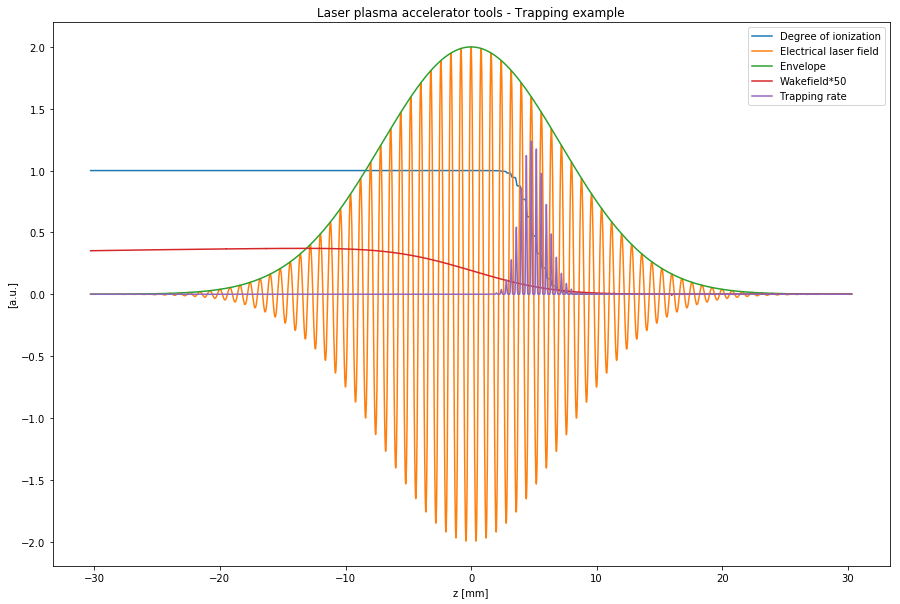

In [9]:
tools.plotter(zz,[degree,laser_field,laser_envelope,wake*50,trapping_rate/3e17],\
              x_label='z [mm]',y_label='[a.u.]',plot_title='Laser plasma accelerator tools - Trapping example',\
             legend=["Degree of ionization","Electrical laser field","Envelope","Wakefield*50","Trapping rate"])

---

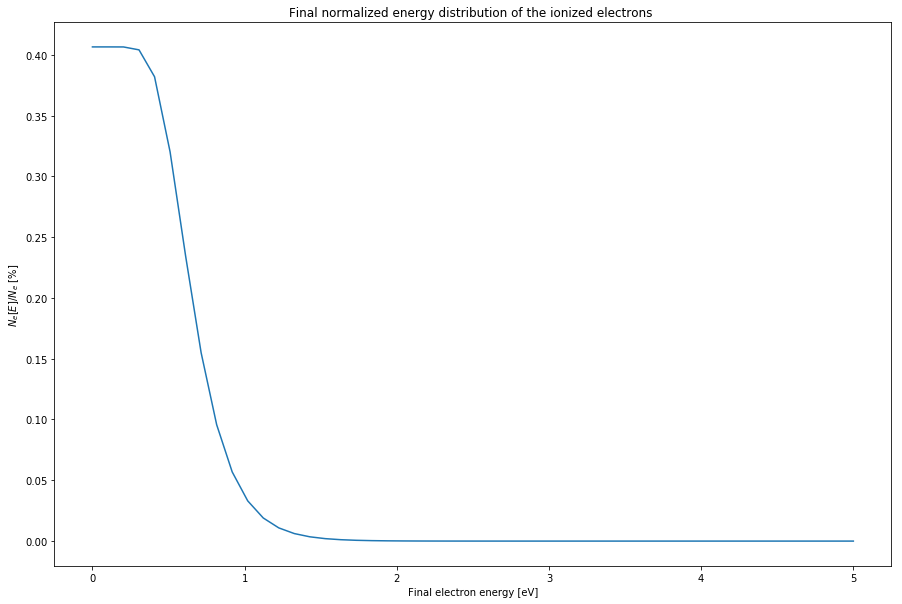

In [20]:
tools.plotter(energy_distribution[0],energy_distribution[1],x_label="Final electron energy [eV]",\
             y_label=r"$N_e[E]/N_e$ [%]", plot_title="Final normalized energy distribution of the ionized electrons ")